# Polynomial Regression

1. Polynomial Regression
1. Assumptions Of Linear Regressions
1. Signs Of Multicolinearity
1. Regularization



## Assumptions of Linear Regressions

* linearity
* reliability of measurement
* homoscedasticity
* normality

or more specifically

1. Validity.
1. Additivity and linearity.
1. Independence of errors
1. Equal variance of errors
1. Normality of errors
1. No absolute correlation between variables

 [Common Mistakes on Intepreting Regressions](https://www.ma.utexas.edu/users/mks/statmistakes/regressioncoeffs.html)

## Polynomial Regression

Consider the following polynomial regression model

$$y = α + β_1x + β_2x^2 + ε$$

** Q: This represents a nonlinear relationship. Is it still a linear model?**

A: Yes, because it’s linear in the β's!

> “Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y|x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.”

<footer>~ Wikipedia</footer>


Polynomial regression allows us to fit very complex
curves to data.

$$y = α + β_1x + β_2x^2 + ... + β_nx^n + ε$$

A very simple [visual reminder](http://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn) of what it means to add polynomials to your design matrix. Code with plot explaining why you'd want to [use polynomials](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html) in the first place. Numpy also provides a [module](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to directly deal with polynomials.

But there is one problem with the model we’ve written
down so far. This model violates one of the assumptions of linear regression!

This model displays multicollinearity, which means the
predictor variables are highly correlated with each other.

In [1]:
import numpy as np

x = np.arange(1, 10, 0.1)
np.corrcoef(x**9,x**10)[0][1]

0.9987609495377574

#### MultiColinearity

Multicollinearity causes the linear regression model to break down, because it can’t tell the predictor variables apart. This results in a singularity.

How can we deal with multicolinearity? Replace the correlated predictors with uncorrelated predictors.

A simple [Standardization Technique](https://www.stat.fi/isi99/proceedings/arkisto/varasto/kim_0574.pdf) to deal with the MultiColinearity of Polynomials. (https://onlinecourses.science.psu.edu/stat501). Another way is to use [Orthoganal Polynomials](http://dlmf.nist.gov/18.4) to deal with multicolinearity. 

$$y = α + β_1f_1(x) + β_2f_2(x^2) + ... + β_nf_n(x^n) + ε$$

## Signs of Multicolinearity

* A regression coefficient is not significant even though, theoretically, that variable should be highly correlated with Y.
* When you add or delete an X variable, the regression coefficients change dramatically.
* You see a negative regression coefficient when your response should increase along with X.
* You see a positive regression coefficient when the response should decrease as X increases.
* Your X variables have high pairwise correlations.


Formally, we can check the tolerance values or `variance inflation ratio` (VIF) to investigate possible collinearity. We define the `tolerance` as 1/ R2 and `VIF` as 1/Tolerance.

The less the tolerance’s value, (or it is closer to zero, or < 0.1), the worse of the collinearity. This is conforms to the formula: as tolerance close to zero then R2 is closer to 1, meaning a stronger linear relation.

It is not surprising, since VIF is the reciprocal of the tolerance, then the larger of the value of VIF, the worse the collinearity!

Usually, if VIF is greater than 10 we should consider it a warning sign! Under the situation when there is collinearity, we may reasonably consider using only one of the correlated variables (ignore the other one, it does not matter which one to choose staying in the model). 

## Regularization

**Q: What’s overfitting?**

Overfitting occurs when a model matches the noise
instead of the signal.

* **Noise**: Extra “cruft” that doesn’t contribute to a readable
prediction.
* **Signal**: Clean, elegant interpretation of the data

This happens when our model is too complex!

**Q: How do we define the complexity of a regression
model?**

A: One method is to define **complexity** as a function of the size of the coefficients.

$Ex1: \lVert \beta_i \rVert_1 =  \Sigma | \beta_i |$ , this is called the **L1-norm**

$Ex2:  \lVert \beta_i \rVert_2 = \Sigma \beta_i^2 $$ $ , this is called the **L2-norm**


These measures of complexity lead to the following
regularization techniques:

#### L1 regularization:
$$y=Σβ_ix_i + ε \quad st. \quad Σ | β_i | \lt s$$
    
#### L2 regularization:
$$y=Σβ_ix_i + ε \quad st. \quad Σ β_i^2 \lt s$$

Regularization refers to the method of preventing
overfitting by explicitly controlling model complexity.

These regularization problems can also be expressed as:

#### L1 regularization:
$$ min(\lVert y - xβ \rVert^2 + λ\lVert x \rVert)$$
    
#### L2 regularization:
$$ min(\lVert y - xβ \rVert^2 + λ\lVert x \rVert^2)$$

but more importantly, we can think about the use cases of these two more clearly this way:

**L1 regularization**:  Used when we have small data but many features.

**L2 regularization**: Used in just about all other cases.

This (Lagrangian) formulation reflects the fact that
there is a cost associated with regularization.

Clear introduction to the [L-1 and L-2 Norms](http://rorasa.wordpress.com/2012/05/13/l0-norm-l1-norm-l2-norm-l-infinity-norm/), the [effects of L1](http://cseweb.ucsd.edu/~saul/teaching/cse291s07/L1norm.pdf)

### Bias and Variance

* **Bias** refers to predictions that are systematically
inaccurate. 
* **Variance** refers to predictions that are generally
inaccurate.

It turns out (after some math) that the generalization error in our model can be decomposed into a bias component and variance component.

#### This is another example of the bias-variance tradeoff.

This tradeoff is regulated by a hyperparameter $λ$, which we’ve already seen:

#### L1 regularization

$$y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i \rVert \lt λ$$


#### L2 regularization

$$y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i^2 \rVert \lt λ$$

We should take advantage of generalization to trade off variance in our data for bias in our fit, which will overall produce a clearer and better overall fit to our data!

## Ordinary Least Squares & Ridge Regression

* Practice using both the `LinearRegression` and `RidgeRegression` models in scikit-learn
* Explore differences between a model using OLS (L1) and LLS (L2) regularization
* Tear apart and understand how predictions get built in scikit learn


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Store data in a consistent place
DATA_DIR = 'data/'

### More in depth understanding behind how scikit learn works

Load up this script (using the same mammals set we glanced at before) and let's break down (and also break) what's going on with each line of code.

In [3]:
from sklearn import linear_model

mammals = pd.read_csv(DATA_DIR + 'mammals.csv')
print(mammals)
lm = linear_model.LinearRegression()
log_lm = linear_model.LinearRegression()

               Name     body  brain
0        Arctic fox    3.385   44.5
1        Owl monkey    0.480   15.5
2   Mountain beaver    1.350    8.1
3               Cow  465.000  423.0
4         Grey wolf   36.330  119.5
..              ...      ...    ...
57  Brazilian tapir  160.000  169.0
58           Tenrec    0.900    2.6
59        Phalanger    1.620   11.4
60       Tree shrew    0.104    2.5
61          Red fox    4.235   50.4

[62 rows x 3 columns]


In [4]:
body = [ [x] for x in mammals['body'].values]
brain = mammals['brain'].values
brain

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

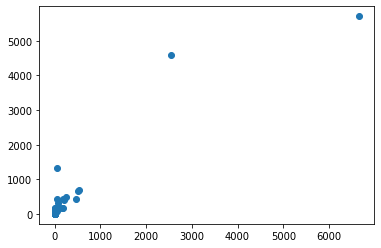

In [5]:
plt.scatter(body,brain)

In [6]:
log_body = [ [x] for x in np.log(mammals['body'].values)]
log_brain = np.log(mammals['brain'].values)

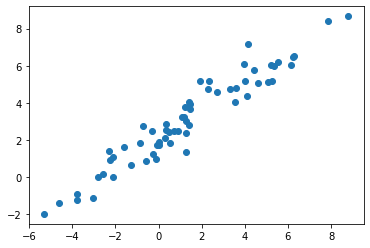

In [7]:
plt.scatter(log_body,log_brain)

In [8]:
lm.fit(body, brain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
log_lm.fit(log_body, log_brain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can observe various features about our linear models that we've discussed in lecture.

#### Find the intercept

Note we can set to train for an intercept with `set_params()`

In [10]:
lm.intercept_

91.00439620740687

In [11]:
log_lm.intercept_

2.134788676764636

#### Print out the predictions for a given matrix

needs to fit the same dimensional space as the data we fit

In [12]:
lm.predict(body)
mammals['predict'] = lm.predict(body)
mammals['predict']

0      94.275986
1      91.468314
2      92.309166
3     540.425207
4     126.117209
         ...    
57    245.643815
58     91.874243
59     92.570120
60     91.104912
61     95.097508
Name: predict, Length: 62, dtype: float64

In [13]:
log_lm.predict(log_body)
mammals['log_predict'] = np.exp(log_lm.predict(log_body))
mammals['log_predict']

0      21.144078
1       4.869905
2      10.594903
3     855.487784
4     125.879932
         ...    
57    383.647997
58      7.811450
59     12.151123
60      1.542569
61     25.022105
Name: log_predict, Length: 62, dtype: float64

### Scipy.stats

Most of the data that is curated from sklearn and statsmodels comes from `scipy.stats`, which has a linear regression built in.

response mean 22.055555555555557
standard Deviation of Y 1.935694598909372
r-squared value 0.9138385502471171
p_value 5.6576124923241295e-05
standard deviation of error terms 0.08317445171439007


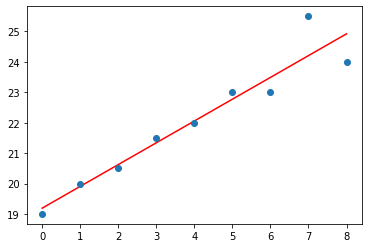

In [14]:
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

xi = arange(0,9)
A = array([ xi, ones(9)])
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

# H0
print ('response mean', np.mean(y))

# Standard Deviation of Y
print ('standard Deviation of Y', np.std(y))

# Coefficient of Determination
print ('r-squared value', r_value**2)

# Is the statistic significant?
print ('p_value', p_value)

print ('standard deviation of error terms', std_err)

line = slope*xi+intercept
plot(xi,line,'r-',xi,y,'o')
show()


### Practice: Plotting Predictions

Since pyplot plots _discretely_ (and not continuously), if we want an accurate representation of any transformed plot (particularly for polynomial data), we need to sort our data frame by the response value. We can either do this before fitting a model (with the actual response) or post-fit (with the predicted response).

In [15]:
# Sort by response:
mammals = mammals.sort_values('brain')

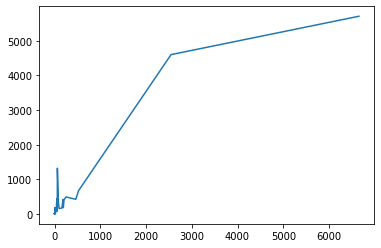

In [16]:
# Sort by prediction:
mammals_log_sort = mammals.sort_values('log_predict')

plot(mammals_log_sort.body, mammals_log_sort.brain)
show()

Otherwise, use plt.scatter and plt.plot as we know how to use them.

### Polynominal regressions

Likewise, polynomial regressions can work as new inputs constructed from our data:

In [17]:
mammals['body_sq'] = mammals['body']**2

The LinearRegression model has no regularization method.

Let's check out a Ridge Regression, which uses L2, and Lasso, which uses L1. Finally, ElasticNet, which is trained with both L1 and L2. To compare, we'll put each in a loop to fit and print some values. 

In [19]:
best_fit, best_score  = None, -1
for regression in [linear_model.LinearRegression, linear_model.Ridge, linear_model.Lasso, linear_model.ElasticNet]:
    mod = regression().fit(mammals[['body', 'body_sq']], mammals['brain'])
    print (type(mod), mod.coef_, mod.intercept_)
    new_score =  mod.score(mammals[['body', 'body_sq']], mammals['brain'])
    print (type(mod), new_score)
    if mod.score(mammals[['body', 'body_sq']], mammals['brain']) >= best_score:
        best_fit = (type(mod))
        best_score = new_score

print ("best Fit is:", best_fit, "with an R^2 of", best_score)

<class 'sklearn.linear_model._base.LinearRegression'> [ 2.12392932e+00 -1.89465969e-04] 19.11529868186767
<class 'sklearn.linear_model._base.LinearRegression'> 0.9535317265882387
<class 'sklearn.linear_model._ridge.Ridge'> [ 2.12392861e+00 -1.89465860e-04] 19.115348638900173
<class 'sklearn.linear_model._ridge.Ridge'> 0.9535317265882102
<class 'sklearn.linear_model._coordinate_descent.Lasso'> [ 2.12390715e+00 -1.89462560e-04] 19.116859541526026
<class 'sklearn.linear_model._coordinate_descent.Lasso'> 0.95353172656037
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'> [ 2.12389628e+00 -1.89460889e-04] 19.11762485387419
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'> 0.9535317265263428
best Fit is: <class 'sklearn.linear_model._base.LinearRegression'> with an R^2 of 0.9535317265882387


and using this against your feature matrix to determine p-values for each feature (we care about the second array it returns for now).


# Polynomial Regression

In [30]:
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Training the Linear Regression model on the whole dataset

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

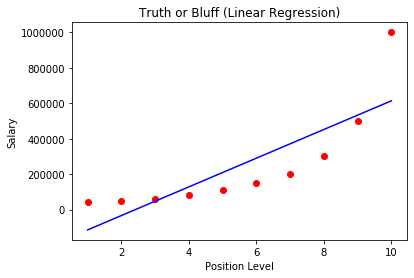

In [33]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

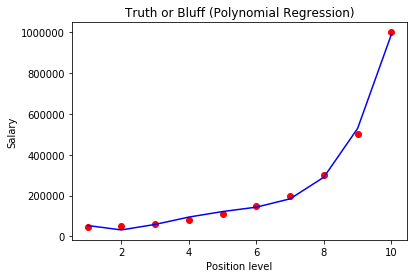

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

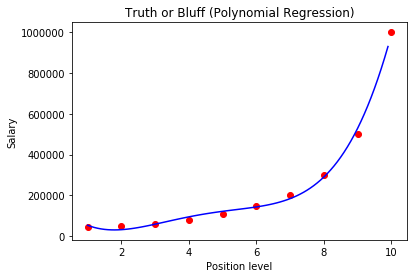

In [35]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

##  Predicting a new result with Linear Regression

In [36]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [37]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])